* https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/
* https://www.geeksforgeeks.org/nlp-synsets-for-a-word-in-wordnet/
* https://github.com/harika-bonthu/StemVsLemma/blob/main/stem_lemma.ipynb

### Importing dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re                # RegEx - used to work with Regular Expressions.
import nltk              # the module is used for Natural Language processing, along with some text processing libraries for tokenisation, stemming, etc.
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
import string
#import snscrape.modules.twitter as sntwitter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M0780773\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\M0780773\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M0780773\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
review_data = pd.read_excel(r'C:\Users\M0780773\OneDrive - Saint-Gobain\Desktop\Projects\Sentiment Analysis\employee_reviews.xlsm')
review_data.head()

,Employee Code,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,Excellent,Good,Excellent,Excellent,Good,Excellent,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,Good,Bad,Average,Average,Excellent,Average,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,Excellent,Excellent,Good,Excellent,Excellent,Good,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,Excellent,Bad,Excellent,Excellent,Good,Excellent,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,https://www.glassdoor.com/Reviews/Google-Revie...


In [3]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Employee Code               67529 non-null  int64 
 1   company                     67529 non-null  object
 2   location                    67529 non-null  object
 3   dates                       67529 non-null  object
 4   job-title                   67529 non-null  object
 5   summary                     67409 non-null  object
 6   pros                        67529 non-null  object
 7   cons                        67529 non-null  object
 8   advice-to-mgmt              67232 non-null  object
 9   overall-ratings             67529 non-null  object
 10  work-balance-stars          67529 non-null  object
 11  culture-values-stars        67529 non-null  object
 12  carrer-opportunities-stars  67529 non-null  object
 13  comp-benefit-stars          67529 non-null  ob

#review_data['pros'][1227]

### Combining Columns - Summary, Pros, Cons, advice-to-mgmt into one new column -> Feedback

In [4]:
review_data['feedback'] = review_data["summary"].astype(str) +" "+ review_data["pros"].astype(str) +" "+ review_data['cons'].astype(str) +" "+ review_data['advice-to-mgmt'].astype(str)

In [5]:
review_data['feedback'][1227]

'Solid place to work Free food, gym and benefits. I like the fact there is a 401-k match. Quite a diverse group of people to work with . Depending on the department, management can either be completely hands off or micro-manage. Can also be limited promotional opportunities. none'

review_data['feedback'] = review_data[['summary', 'pros', 'cons', 'advice-to-mgmt']].apply(lambda x: ' '.join(x), axis = 1)

merged_column = pd.concat([review_data['summary'], review_data['pros'], review_data['cons'], review_data['advice-to-mgmt']], axis=1)
print(merged_column)

#### Next Steps:
1. Add Employee# column against each record - done
2. take the feedback column and try finding sentiment analysis for each employee (Polarity index)

##### Saving the feedback column in a new dataframe

#emp_review_data = review_data['feedback']

#emp_review_data.info()

In [6]:
emp_review_data = pd.DataFrame(data=review_data, columns=['feedback'])

In [7]:
emp_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   feedback  67529 non-null  object
dtypes: object(1)
memory usage: 527.7+ KB


In [8]:
emp_review_data.head()

,feedback
0,Best Company to work for People are smart and ...
1,"Moving at the speed of light, burn out is inev..."
2,Great balance between big-company security and...
3,The best place I've worked and also the most d...
4,"Unique, one of a kind dream job Google is a wo..."


In [9]:
emp_review_data.rename(columns = {'feedback':'text'}, inplace = True)
emp_review_data.head()

,text
0,Best Company to work for People are smart and ...
1,"Moving at the speed of light, burn out is inev..."
2,Great balance between big-company security and...
3,The best place I've worked and also the most d...
4,"Unique, one of a kind dream job Google is a wo..."


### Applying Text Preprocessing in the review data

In [10]:
characterMap = {u'\u00E7': 'c', u'\u00C7' : 'C', u'\u011F' : 'g', u'\u011E' : 'G', 
                u'\u00F6': 'o', u'\u00D6' : 'O', u'\u015F' : 's', u'\u015E' : 'S', 
                u'\u00FC' : 'u', u'\u00DC' : 'U' , u'\u0131' : 'i', u'\u0049' : 'I', 
                u'\u0259' : 'e', u'\u018F' : 'E'}

In [11]:
# for removing punctuations from the text.
def remove_punctuation(text):  
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [12]:
# for removing additional punctuations and non sensical text that was missed the first time around
def clean_text_round2(text, words):
    
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
    return text

In [13]:
# for lemmatization of text
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [14]:
def stem_lemma(df,txt):
    lemmatize_text = txt
    data['text'] = df.text.apply(lemmatize_text)
    data['text'] = data.text.apply(' '.join)
    
    return data;

In [15]:
# for text preprocessing
def text_preprocessing(data):
    
    # step 1: remove ascent letters
    data['text'] = (data['text'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space
                              .replace(characterMap, regex=True)
                              .str.normalize('NFKD')
                              .str.encode('ascii', errors='ignore')
                              .str.decode('utf-8'))
    
    
    # Step 2: converting to lowercase
    data.text = data.text.str.lower()
    
    # Step 3: removing URL from data
    data['text'] = data['text'].str.replace(r'http\S+|www.\S+','',case=False)
    
    # Step 4: removing punctuation
    string.punctuation
    data['text']=data['text'].apply(lambda x : remove_punctuation(x))
    
    # Step 5: Removing numbers from data
    data['text'] = data['text'].str.replace('\d+', '')
    
    # Step 6: Removing stopwords from data
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    # Step 7: Replacing Similar codes in the data
    nltk.download('words')
    words = set(nltk.corpus.words.words())
    round2 = lambda x: clean_text_round2(x, words)
    data = pd.DataFrame(data.text.apply(round2))
    
    # Step 8: Applying Stemming and Lemmatisation
    from nltk.stem import PorterStemmer
    nltk.download('wordnet')
    # the most commonly used stemmer
    ps = PorterStemmer()
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    #data = stem_lemma(data, lemmatizer)
    def lemmatize_text(text):
        return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    
    data['text'] = data.text.apply(lemmatize_text)
    data['text'] = data.text.apply(' '.join)
    
    # Step 9: Strip Extra Whitespaces
    data['text'] = (data['text'].astype("str").str.rstrip())
    
    return data;

#### Preprocessing the employee feedback

In [16]:
processed_data = text_preprocessing(emp_review_data)
processed_data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M0780773\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\M0780773\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\M0780773\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text
0,best company work people smart friendly bureau...
1,moving speed light burn inevitable food food f...
2,great balance security fun engineer among hill...
3,best place worked also demanding cant find com...
4,unique one kind dream job world every company ...


#### POS Tagger Dictionary - for SentiWordNet

#### POS tagger dictionary
from nltk.corpus import wordnet
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
            
            return newlist



processed_data.head()

processed_data['POS tagged'] = processed_data['text'].apply(token_stop_pos)
processed_data.head()

##### Preparing WordCloud on the processed data

##### Document Term Matrix

In [17]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# preparing the document term matrix for identifying most frequent words in the collection of text
def doc_term_matrix(data):
    
    cv = CountVectorizer(stop_words='english')
    data_cv = cv.fit_transform(data.text)
    data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

    # One of the required inputs is a term-document matrix
    tdm = data_dtm.transpose()

    tdm['freq'] = tdm.sum(axis=1)
    
    tdm.reset_index(inplace=True)
    
    tdm1=tdm[["index","freq"]]
    tdm1.rename(columns = {'index':'Word'}, inplace = True)
    tdm1.sort_values(by='freq',ascending=False,inplace=True)
    
    return tdm1;

In [19]:
# Function to plot bar-graph for visualization of most frequent words
def plot_bar(df):
    
    import seaborn as sns
    tdm1 = doc_term_matrix(df)
    
    w = tdm1[tdm1['freq'] >=2000] 
    
    fg = sns.catplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

In [20]:
# Function to form word-cloud on tweets collected
def plot_wordcloud(df_feedback):
    text = " ".join(review for review in df_feedback.text)
    print ("There are {} words in the combination of all review.".format(len(text)))
    

    wordcloud = WordCloud(background_color="white",max_words=2000,collocations=False).generate(text)
    plt.figure(figsize=[15,27])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [21]:
import seaborn as sns
sns.__version__

'0.12.2'

In [22]:
plot_bar(processed_data)

MemoryError: Unable to allocate 7.48 GiB for an array with shape (67530, 14859) and data type int64

Solution for: MemoryError: Unable to allocate 7.48 GiB for an array with shape (67530, 14859) and data type int64
https://stackoverflow.com/questions/57507832/unable-to-allocate-array-with-shape-and-data-type 

1. Press the Windows key
2. Type SystemPropertiesAdvanced
3. Click Run as administrator
4. Under Performance, click Settings
5. Select the Advanced tab
6. Select Change...
7. Uncheck Automatically managing paging file size for all drives
8. Then select Custom size and fill in the appropriate size
9. Press Set then press OK then exit from the Virtual Memory, Performance Options, and System Properties Dialog
10. Reboot your system.


Working Alright in Colab Pro.

In [23]:
processed_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    67529 non-null  object
dtypes: object(1)
memory usage: 17.1 MB


There are 14120330 words in the combination of all review.


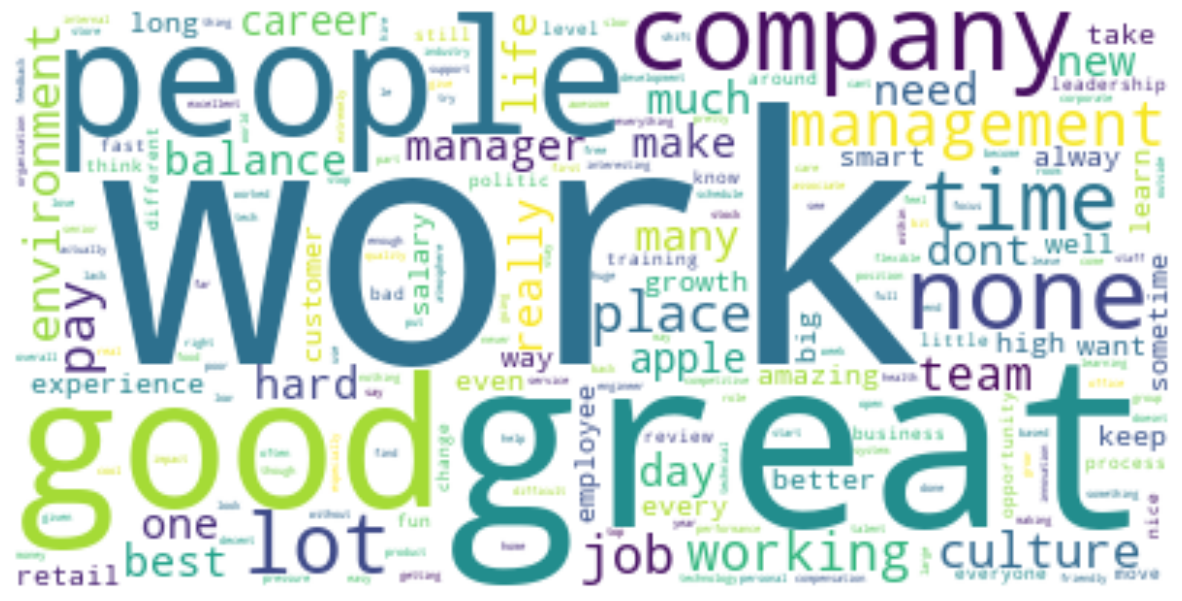

In [24]:
plot_wordcloud(processed_data)

In [33]:
#### FIND
freq_words=doc_term_matrix(processed_data)
freq_words.head()

MemoryError: Unable to allocate 7.48 GiB for an array with shape (67529, 14859) and data type int64

Refer the above workaround.  - Working alright in Colab Pro.

### Sentiment Analysis on the processed data using Polarity

In [25]:
def check_sentiments(feedback_data):
    pol = lambda x: TextBlob(x).sentiment.polarity
    feedback_data['polarity'] = feedback_data['text'].apply(pol) #adding a column polarity with values
    
    #adding another column 'Sentiment' which represents the tweet being positive or negative
    feedback_data['Sentiment'] = np.where(feedback_data['polarity']>=0, 'Positive', 'Negative')     
    
    #adding another column 'Sentiment2' which represents the tweet being positive, negative and neutral
    feedback_data['Sentiment2'] = np.where(feedback_data.polarity< 0, 'Negative', np.where(feedback_data.polarity> 0,'Positive', 'Neutral'))
    
    #feedback_data['chk_positive'] = np.where(feedback_data['Sentiment'] == 'Positive', 1, 0)
    
    #feedback_data['chk_sentiment'] = np.where(feedback_data['polarity']> 0, 1, 0)
    
    return feedback_data;

In [26]:
final_data = check_sentiments(processed_data)

Polarity ranges from -1 to 1 (1 is more positive, 0 is neutral, -1 is more negative)

In [27]:
final_data.tail()

,text,polarity,Sentiment,Sentiment2
67524,enriching experience beginner bad long term gr...,0.177273,Positive,Positive
67525,complex interesting experience change either c...,0.208163,Positive,Positive
67526,good place work nice place work good atmospher...,0.666667,Positive,Positive
67527,competitive work place overload work growing p...,-0.053571,Negative,Negative
67528,used great compensation health brand name reco...,0.340000,Positive,Positive


In [28]:
final_data.Sentiment.value_counts()

Positive    62456
Negative     5073
Name: Sentiment, dtype: int64

In [29]:
final_data.Sentiment2.value_counts()

Positive    60854
Negative     5073
Neutral      1602
Name: Sentiment2, dtype: int64

In [30]:
polarity_count = final_data['Sentiment2'].value_counts()
polarity_count

Positive    60854
Negative     5073
Neutral      1602
Name: Sentiment2, dtype: int64

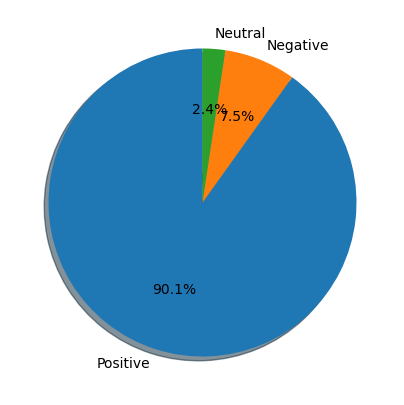

In [31]:
labels = ['Positive','Negative','Neutral']
fig = plt.figure(figsize =(5, 5))
plt.pie(polarity_count, labels = labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
 
# show plot
plt.show()

### Rule Based Sentiment Analysis - using Vader Sentiment (Lexicon Based)
#### VADER = Valence Aware Dictionary and Sentiment Reasoner

In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(tweet):
    vs = analyzer.polarity_scores(tweet)
    return vs['compound']
    

    # function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

final_data['Vader_Sentiment'] = final_data['text'].apply(vadersentimentanalysis)
final_data['Vader_Analysis'] = final_data['Vader_Sentiment'].apply(vader_analysis)
final_data.head()

,text,polarity,Sentiment,Sentiment2,Vader_Sentiment,Vader_Analysis
0,best company work people smart friendly bureau...,0.529762,Positive,Positive,0.8779,Positive
1,moving speed light burn inevitable food food f...,0.180260,Positive,Positive,0.9955,Positive
2,great balance security fun engineer among hill...,0.130369,Positive,Positive,0.9963,Positive
3,best place worked also demanding cant find com...,0.156643,Positive,Positive,0.9983,Positive
4,unique one kind dream job world every company ...,0.147752,Positive,Positive,0.9997,Positive


In [34]:
final_data.tail(20)

,text,polarity,Sentiment,Sentiment2,Vader_Sentiment,Vader_Analysis
67509,interesting knowledge dynamic great career sta...,0.320000,Positive,Positive,0.8834,Positive
67510,work life balance great compensation mark best...,0.466667,Positive,Positive,0.9022,Positive
67511,highly technical people one grow excellent imm...,0.121875,Positive,Positive,0.5414,Positive
67512,overall good however group great benefit packa...,0.169481,Positive,Positive,0.8176,Positive
67513,good career path learn experience lot one top ...,0.276667,Positive,Positive,0.6249,Positive
67514,stable company still lazy people good benefit ...,0.252857,Positive,Positive,0.6808,Positive
67515,work guess somebody good free phone gift cheap...,0.362500,Positive,Positive,0.9482,Positive
67516,mixed group one group pretty good organization...,0.220336,Positive,Positive,0.9418,Positive
67517,work everyday regular basis grow easily forget...,0.001587,Positive,Positive,0.6444,Positive
67518,cult used far job lot new stuff almost daily k...,0.078788,Positive,Positive,-0.7549,Negative


In [35]:
vader_counts = final_data['Vader_Analysis'].value_counts()
vader_counts

Positive    53608
Neutral     11896
Negative     2025
Name: Vader_Analysis, dtype: int64

In [36]:
final_data.tail(20)

,text,polarity,Sentiment,Sentiment2,Vader_Sentiment,Vader_Analysis
67509,interesting knowledge dynamic great career sta...,0.320000,Positive,Positive,0.8834,Positive
67510,work life balance great compensation mark best...,0.466667,Positive,Positive,0.9022,Positive
67511,highly technical people one grow excellent imm...,0.121875,Positive,Positive,0.5414,Positive
67512,overall good however group great benefit packa...,0.169481,Positive,Positive,0.8176,Positive
67513,good career path learn experience lot one top ...,0.276667,Positive,Positive,0.6249,Positive
67514,stable company still lazy people good benefit ...,0.252857,Positive,Positive,0.6808,Positive
67515,work guess somebody good free phone gift cheap...,0.362500,Positive,Positive,0.9482,Positive
67516,mixed group one group pretty good organization...,0.220336,Positive,Positive,0.9418,Positive
67517,work everyday regular basis grow easily forget...,0.001587,Positive,Positive,0.6444,Positive
67518,cult used far job lot new stuff almost daily k...,0.078788,Positive,Positive,-0.7549,Negative


In [43]:
output_data = final_data.copy()
output_data.head()

,text,polarity,Sentiment,Sentiment2,Vader_Sentiment,Vader_Analysis,chk_positive,chk_sentiment
0,best company work people smart friendly bureau...,0.529762,Positive,Positive,0.8779,Positive,1,1
1,moving speed light burn inevitable food food f...,0.180260,Positive,Positive,0.9955,Positive,1,1
2,great balance security fun engineer among hill...,0.130369,Positive,Positive,0.9963,Positive,1,1
3,best place worked also demanding cant find com...,0.156643,Positive,Positive,0.9983,Positive,1,1
4,unique one kind dream job world every company ...,0.147752,Positive,Positive,0.9997,Positive,1,1


In [47]:
review_data.columns

Index(['Employee Code', 'company', 'location', 'dates', 'job-title', 'summary',
       'pros', 'cons', 'advice-to-mgmt', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'link', 'feedback'],
      dtype='object')

##### Adding Employee Code and Company columns in the output_data dataframe.

In [48]:
output_data['Employee_Code'] = review_data['Employee Code']
output_data['Company'] = review_data['company']

In [50]:
output_data.columns

Index(['text', 'polarity', 'Sentiment', 'Sentiment2', 'Vader_Sentiment',
       'Vader_Analysis', 'chk_positive', 'chk_sentiment', 'Employee_Code',
       'Company'],
      dtype='object')

##### Rearranging columns

In [51]:
cols = ['Employee_Code', 'Company', 'text', 'polarity', 'Sentiment', 'Sentiment2', 'Vader_Sentiment',
       'Vader_Analysis', 'chk_positive', 'chk_sentiment']

In [52]:
output_data = output_data[cols]

In [53]:
output_data.columns

Index(['Employee_Code', 'Company', 'text', 'polarity', 'Sentiment',
       'Sentiment2', 'Vader_Sentiment', 'Vader_Analysis', 'chk_positive',
       'chk_sentiment'],
      dtype='object')

In [54]:
output_data.head()

,Employee_Code,Company,text,polarity,Sentiment,Sentiment2,Vader_Sentiment,Vader_Analysis,chk_positive,chk_sentiment
0,1,google,best company work people smart friendly bureau...,0.529762,Positive,Positive,0.8779,Positive,1,1
1,2,google,moving speed light burn inevitable food food f...,0.180260,Positive,Positive,0.9955,Positive,1,1
2,3,google,great balance security fun engineer among hill...,0.130369,Positive,Positive,0.9963,Positive,1,1
3,4,google,best place worked also demanding cant find com...,0.156643,Positive,Positive,0.9983,Positive,1,1
4,5,google,unique one kind dream job world every company ...,0.147752,Positive,Positive,0.9997,Positive,1,1


##### Exporting output data to local file location

In [63]:
output_data.to_csv(r'C:\Users\M0780773\OneDrive - Saint-Gobain\Desktop\Projects\Sentiment Analysis\final_output.csv')

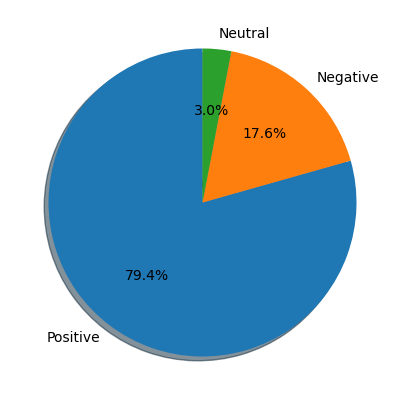

In [37]:
labels = ['Positive','Negative','Neutral']
fig = plt.figure(figsize =(5, 5))
plt.pie(vader_counts, labels = labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
 
# show plot
plt.show()

##### For checking the accuracy of the model

In [38]:
def update_sentiments_va(feedback_data):
    
    #adding another column 'Sentiment' which represents the tweet being positive or negative
    #feedback_data['Sentiment'] = np.where(feedback_data['Vader_Sentiment']>=0, 'Positive', 'Negative')     
    
    #adding another column 'Sentiment2' which represents the tweet being positive, negative and neutral
    #feedback_data['Sentiment2'] = np.where(feedback_data.polarity< 0, 'Negative', np.where(feedback_data.polarity> 0,'Positive', 'Neutral'))
    
    feedback_data['chk_positive'] = np.where(feedback_data['Vader_Analysis'] == 'Positive', 1, 0)
    
    feedback_data['chk_sentiment'] = np.where(feedback_data['Vader_Sentiment']>0, 1, 0)
    
    return feedback_data;

In [39]:
final_data_va = update_sentiments_va(processed_data)

In [40]:
final_data_va.tail(20)

,text,polarity,Sentiment,Sentiment2,Vader_Sentiment,Vader_Analysis,chk_positive,chk_sentiment
67509,interesting knowledge dynamic great career sta...,0.320000,Positive,Positive,0.8834,Positive,1,1
67510,work life balance great compensation mark best...,0.466667,Positive,Positive,0.9022,Positive,1,1
67511,highly technical people one grow excellent imm...,0.121875,Positive,Positive,0.5414,Positive,1,1
67512,overall good however group great benefit packa...,0.169481,Positive,Positive,0.8176,Positive,1,1
67513,good career path learn experience lot one top ...,0.276667,Positive,Positive,0.6249,Positive,1,1
67514,stable company still lazy people good benefit ...,0.252857,Positive,Positive,0.6808,Positive,1,1
67515,work guess somebody good free phone gift cheap...,0.362500,Positive,Positive,0.9482,Positive,1,1
67516,mixed group one group pretty good organization...,0.220336,Positive,Positive,0.9418,Positive,1,1
67517,work everyday regular basis grow easily forget...,0.001587,Positive,Positive,0.6444,Positive,1,1
67518,cult used far job lot new stuff almost daily k...,0.078788,Positive,Positive,-0.7549,Negative,0,0


#### Rule Based Sentiment Analysis (Method III) - using SentiWordNet (**** Not using it)

nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
            synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += swn_synset.pos_score() - swn_synset.neg_score()
            tokens_count += 1
            # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"


final_data['SWN analysis'] = processed_data['POS tagged'].apply(sentiwordnetanalysis)
final_data.head()

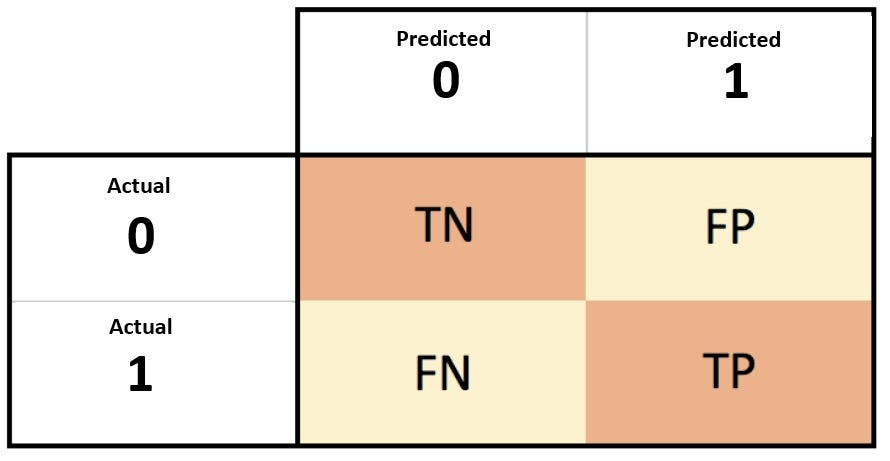

In [55]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(final_data_va['chk_positive'], final_data_va['chk_sentiment']))

[[ 6365  7556]
 [    0 53608]]


In [56]:
from sklearn.metrics import classification_report

print(classification_report(final_data_va['chk_positive'], final_data_va['chk_sentiment']))

              precision    recall  f1-score   support

           0       1.00      0.46      0.63     13921
           1       0.88      1.00      0.93     53608

    accuracy                           0.89     67529
   macro avg       0.94      0.73      0.78     67529
weighted avg       0.90      0.89      0.87     67529



* Precision = TP / (TP + FP) 
* Recall = TP / (TP + FN)
* F1 = 2 * ((Precision * Recall)/(Precision + Recall))
* Accuracy = (TP + TN) / (TP + FP + TN + FN)
* Specificity = TN / (TN + FP)

In [57]:
TP = 53608  ### Out of the actual positive, how many are correctly predicted to be positive?
FP = 7556   ### Out of the actual negatives, how many are incorrectly predicted to be positive?
FN = 0      ### Out of the actual positives, how many are incorrectly predicted to be negative? 
TN = 6365   ### Out of the actual negatives, how many are correctly predicted to be negative?

In [58]:
Precision = TP / (TP + FP)
print("Precision: ", Precision)

Precision:  0.8764632790530378


Out of all the positive predictions we made, how many were true?
        
       When the sentiment analyzer predicts the sentiment as positive, it is correct around 87.6% of the time.

In [59]:
Recall = TP / (TP + FN)
print("Recall: ", Recall)

Recall:  1.0


Out of all the data points that should be predicted as true, how many did we correctly predict as true?

        Out of the actual positive values, 100% are correctly predicted (to be positive).

In [60]:
F1 = 2 * ((Precision * Recall)/(Precision + Recall))
print("F1: ", F1)

F1:  0.9341651273829854


 measure of a model’s accuracy on a dataset - 
 
         how many times a model made a correct prediction across the entire dataset - 93.4%

In [61]:
Specificity = TN / (TN + FP)
print("Specificity: ", Specificity)

Specificity:  0.45722290065368865


        Out of all the actual negative values, 45% are correctly predicted to be negative/ negative sentiments.

In [62]:
Accuracy = (TP + TN) / (TP + FP + TN + FN)
print("Accuracy: ", Accuracy)

Accuracy:  0.8881073316649143


Out of all the predictions we made, how many were true?

#### Outcome: Rule-based sentiment analysis model is 89%.